In [1]:
using Gen
using Random
using Distributions
using StatsBase: mean, std, quantile
using BenchmarkTools
using FilePathsBase;
using LinearAlgebra: dot, Diagonal
using JSON
import PyPlot
plt = PyPlot.plt
using JLD

display(HTML("<style>.rendered_html.text_cell_render {max-width:700px; }</style>"));

HTML{String}("<style>.rendered_html.text_cell_render {max-width:700px; }</style>")

In [2]:
include("utils.jl")
include("../environment.jl")
include("../raycaster.jl")
include("../path_planning.jl")

get_random_path (generic function with 2 methods)

**Choose an environment**

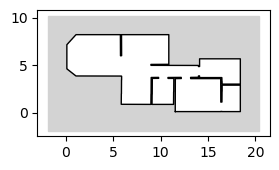

In [3]:
env = load_env(2010; path=p"../data/HouseExpo_json");
plt.figure(figsize=(3,3)); plt.gca().set_aspect(1.);
draw_env!(env);

**Choose a path**

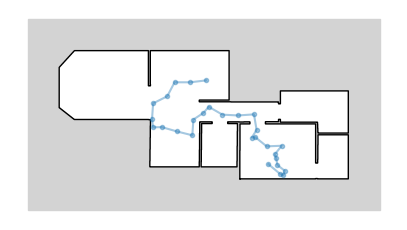

(28, 2)(28,)(27,)(27,)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8b647e7290>

In [15]:
path = get_random_path(env, PlannerParams(2000, 1., .01, 1000, 1.0, 0.2); simplify=false)
x, hd, s, dhd = decompose(path)
hd  = [hd[1]; hd...]
dhd = [0; dhd...]
# Rem: The head directions etc needed to be adjusted 
# ---  to fit the slam model
println(size(x), size(hd), size(s), size(dhd))
plt.figure(figsize=(5,5)); plt.gca().set_aspect(1.); plt.gca().axis("off")
draw_env!(env)
plt.plot(x[:,1],x[:,2], c="C0", marker=".", alpha=.4, zorder=4)

**Collect measurements along the path**

In [16]:
T = length(hd)

fov = 180
n = 100
max_val = Inf

zs = []
as = []

for t=1:T
    z,a = pseudo_lidar(x[t,:], hd[t], fov, n, env; max_val=max_val)
    push!(zs, z)
    push!(as, a)
end

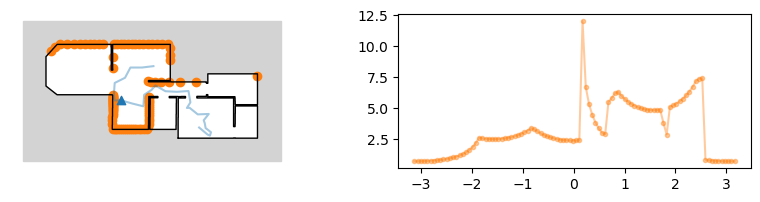

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8b668fd1d0>

In [17]:
t=rand(1:length(zs))
fig, axs = plt.subplots(1,2,figsize=(10,2)); 
axs[1].set_aspect(1); axs[1].axis("off");
draw_env!(env; ax=axs[1])
y = zs[t] .* [cos.(as[t]) sin.(as[t])]
y .+= x[t,:]'

axs[1].scatter(y[:,1],y[:,2], c="C1")
axs[1].scatter(x[t,1], x[t,2], c="C0", marker="^", alpha=1., zorder=10)
axs[1].plot(x[:,1], x[:,2], c="C0", alpha=.4, zorder=9)
axs[2].plot(as[t], zs[t], c="C1", marker=".", alpha=.4)

**Save the measurements**

In [18]:
save("example_sensor_data.jld", 
        "x", x, 
        "hd", hd, 
        "s", s, 
        "dhd", dhd, 
        "z",zs,
        "a",as, 
        "fov", fov, 
        "n", n, 
        "max_val", max_val, 
        "env_id", env.id)

┌ Warning: JLD incorrectly extends FileIO functions (see FileIO documentation)
└ @ FileIO /Users/mirko/.julia/packages/FileIO/AmppF/src/loadsave.jl:210
